#### ARIMA model for natural gas

An autoregressive integrated moving average model is a form of regression analysis that gauges the strength of one dependent variable relative to other changing variables. The model's goal is to predict future securities or financial market moves by examining the differences between values in the series instead of through actual values.

Autoregression (AR): refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.

Integrated (I): represents the differencing of raw observations to allow the time series to become stationary (i.e., data values are replaced by the difference between the data values and the previous values).

Moving average (MA):  incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

#### load dataset

In [2]:
no_days = 180
today = datetime.now()
begin = (today - timedelta(days=no_days)).strftime('%Y-%m-%d')
ng_data = yf.download('NG=F', start=begin)['Adj Close']
ng_data

[*********************100%***********************]  1 of 1 completed


Date
2023-01-30    2.677
2023-01-31    2.684
2023-02-01    2.468
2023-02-02    2.456
2023-02-03    2.410
              ...  
2023-07-24    2.685
2023-07-25    2.730
2023-07-26    2.665
2023-07-27    2.492
2023-07-28    2.636
Name: Adj Close, Length: 125, dtype: float64

In [3]:
model = ARIMA(ng_data, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  125
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  96.494
Date:                Fri, 28 Jul 2023   AIC                           -180.987
Time:                        09:52:52   BIC                           -164.065
Sample:                             0   HQIC                          -174.113
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1976      0.086     -2.292      0.022      -0.367      -0.029
ar.L2         -0.0988      0.097     -1.023      0.306      -0.288       0.091
ar.L3         -0.0081      0.106     -0.076      0.9

C:\Users\david\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\david\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\david\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### plot residuals

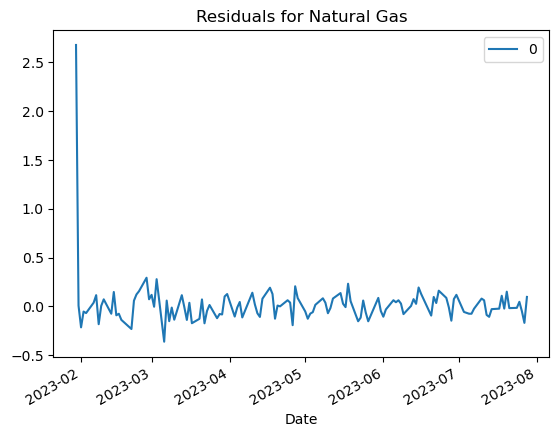

In [4]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals for Natural Gas')
plt.show()

#### density plot for residuals

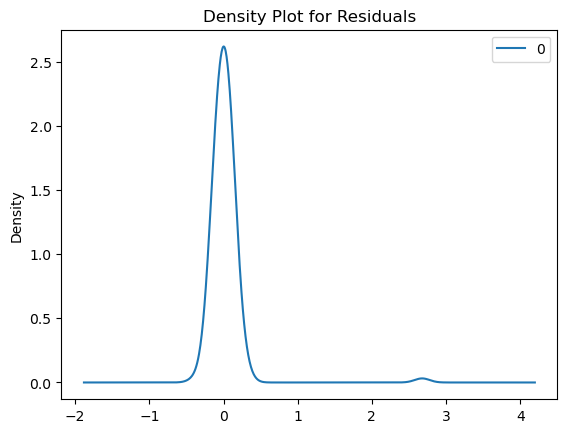

In [5]:
residuals.plot(kind='kde')
plt.title('Density Plot for Residuals')
plt.show()

#### summary stats for residuals

In [6]:
print(residuals.describe())

                0
count  125.000000
mean     0.020859
std      0.264009
min     -0.361761
25%     -0.075453
50%      0.004574
75%      0.078609
max      2.677000


#### rolling forecast with ARIMA model

In [7]:
# split into train and test sets
size = int(len(ng_data) * 0.66)
train, test = ng_data[0:size], ng_data[size:len(ng_data)]
history = [x for x in train]
predictions = list()

In [8]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (pred,obs))

predicted=2.341915, expected=2.181000
predicted=2.236148, expected=2.327000
predicted=2.306774, expected=2.266000
predicted=2.267873, expected=2.158000
predicted=2.207247, expected=2.172000
predicted=2.180813, expected=2.245000
predicted=2.212187, expected=2.262000
predicted=2.267697, expected=2.329000
predicted=2.327559, expected=2.352000
predicted=2.336816, expected=2.254000
predicted=2.262508, expected=2.266000
predicted=2.263238, expected=2.340000
predicted=2.312791, expected=2.342000
predicted=2.339912, expected=2.533000
predicted=2.506097, expected=2.632000
predicted=2.595752, expected=2.492000
predicted=2.503950, expected=2.597000
predicted=2.571565, expected=2.608000
predicted=2.562411, expected=2.729000
predicted=2.704704, expected=2.791000
predicted=2.779867, expected=2.763000
predicted=2.756654, expected=2.603000
predicted=2.625070, expected=2.701000
predicted=2.674673, expected=2.798000
predicted=2.765834, expected=2.709000
predicted=2.732083, expected=2.657000
predicted=2.

In [9]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.091


In [10]:
predictions = pd.Series(predictions)
predictions.index = test.index

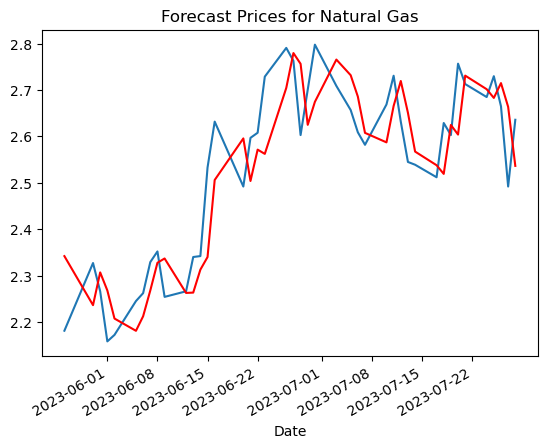

In [11]:
# plot forecasts against actual outcomes
test.plot()
predictions.plot(color='red')
plt.title('Forecast Prices for Natural Gas')
plt.show()